In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cmocean
%matplotlib inline

In [2]:
fSME=nc.Dataset('/data/eolson/MEOPAR/SS36runs/CedarRuns/testHC1612/SalishSea_1h_20150101_20150110_ptrc_T_20150110-20150110.nc')
fSSC=nc.Dataset('/results/SalishSea/hindcast.201812/10jan15/SalishSea_1h_20150110_20150110_ptrc_T.nc')

In [3]:
print([var for var in fSME.variables.keys()])
print([var for var in fSSC.variables.keys()])

['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'nitrate', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'mesozooplankton']
['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'nitrate', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'mesozooplankton']


In [4]:
for var in ('nitrate','ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'mesozooplankton'):
    print(var,np.max(np.abs(fSME.variables[var][:]-fSSC.variables[var][:])))

nitrate 0.0
ammonium 0.0
silicon 0.0
diatoms 0.0
flagellates 0.0
ciliates 0.0
microzooplankton 0.0
dissolved_organic_nitrogen 0.0
particulate_organic_nitrogen 0.0
biogenic_silicon 0.0
mesozooplankton 0.0


Surface


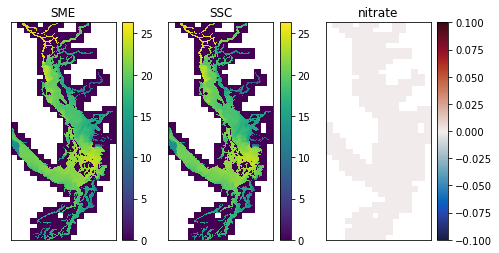

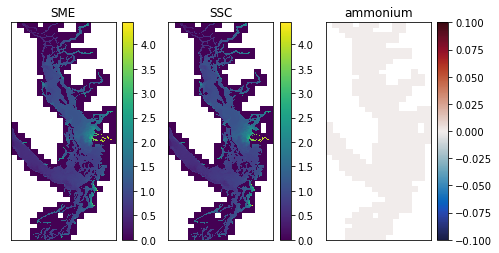

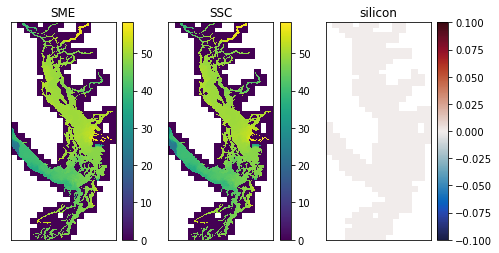

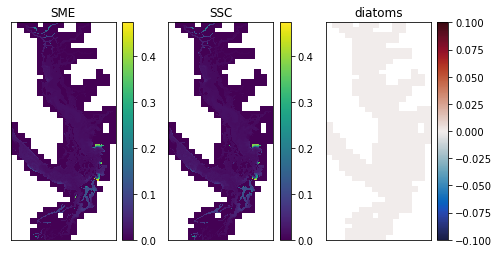

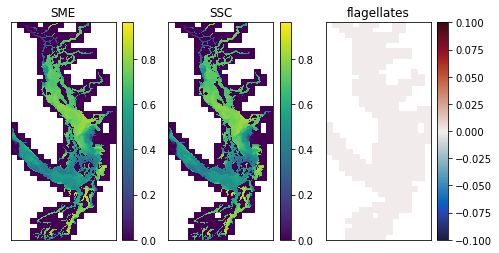

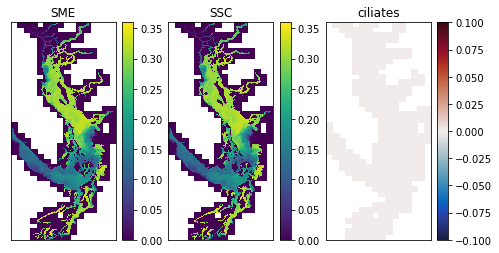

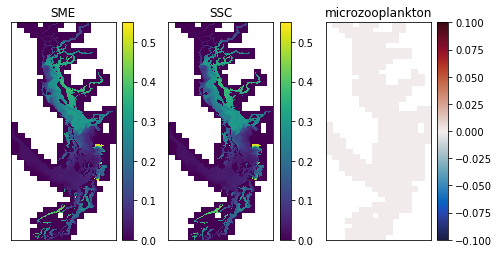

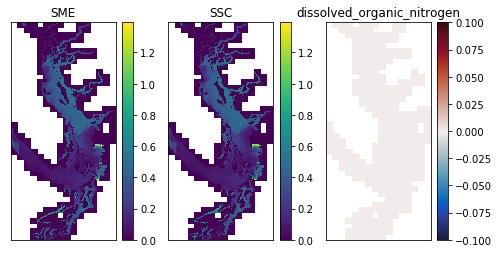

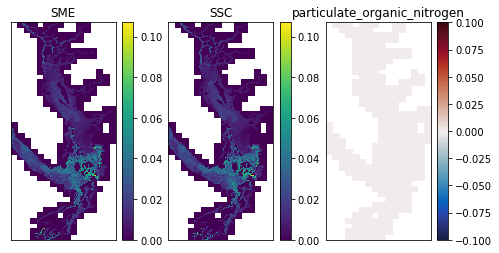

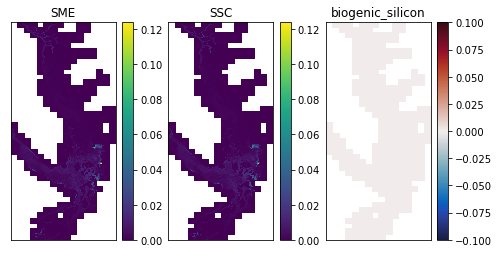

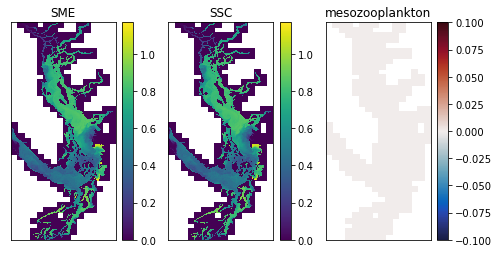

In [5]:
for var in ('nitrate','ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'mesozooplankton'):
    fig,ax=plt.subplots(1,3,figsize=(8,4))
    mesh0=ax[0].pcolormesh(fSME.variables[var][0,0,:,:])
    mesh1=ax[1].pcolormesh(fSSC.variables[var][0,0,:,:])
    icalc=fSME.variables[var][0,0,:,:]-fSSC.variables[var][0,0,:,:]
    a=np.max(np.abs(icalc))/2
    mesh2=ax[2].pcolormesh(icalc,vmin=-a,vmax=a,cmap=cmocean.cm.balance)
    ax[2].set_title(var)
    fig.colorbar(mesh0,ax=ax[0])
    fig.colorbar(mesh1,ax=ax[1])
    fig.colorbar(mesh2,ax=ax[2])
    for axi in (ax[0],ax[1],ax[2]):
        axi.set_xticks([])
        axi.set_yticks([])
    ax[0].set_title('SME')
    ax[1].set_title('SSC')
print('Surface')

k=30


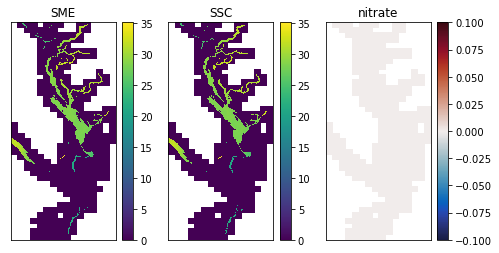

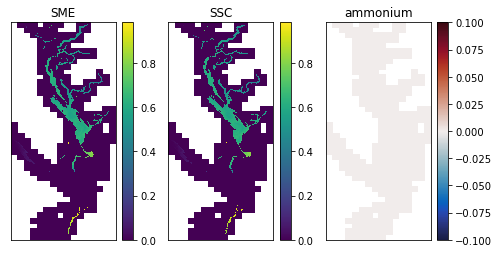

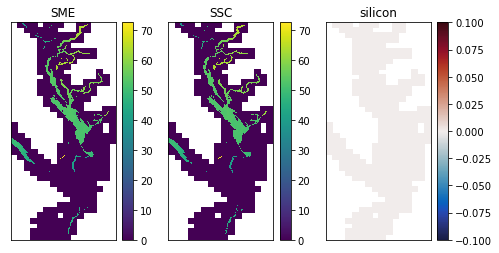

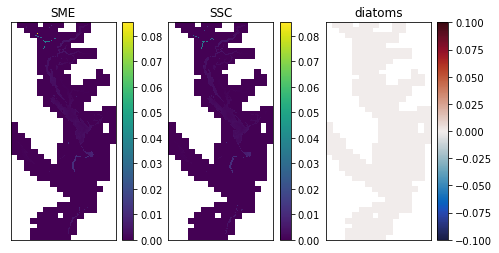

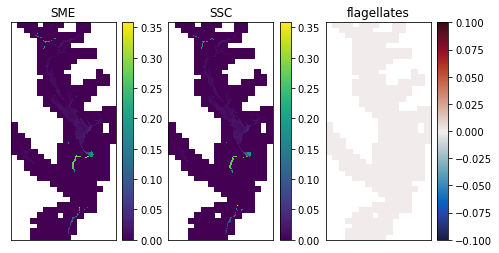

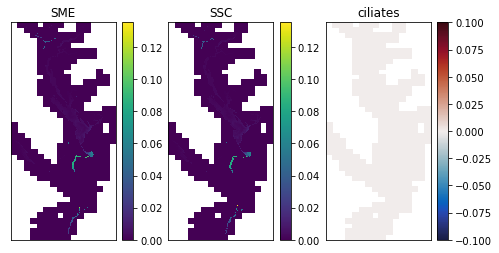

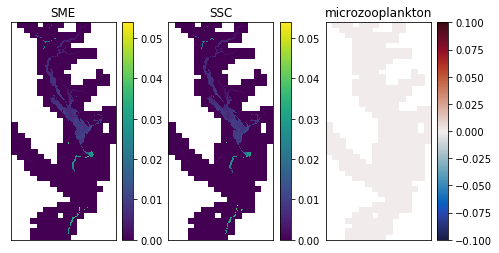

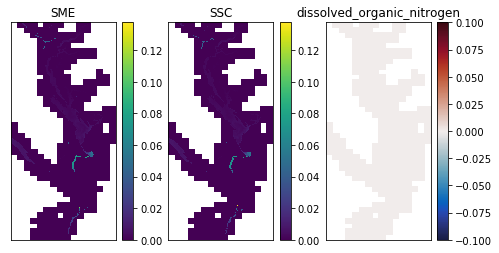

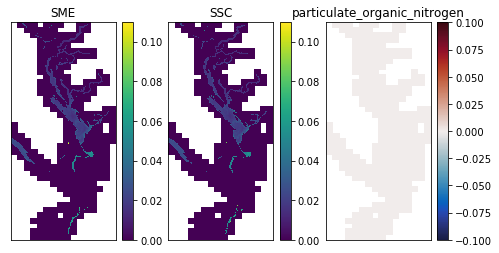

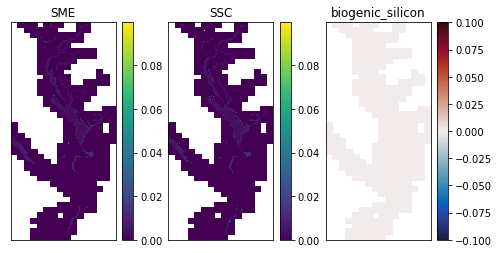

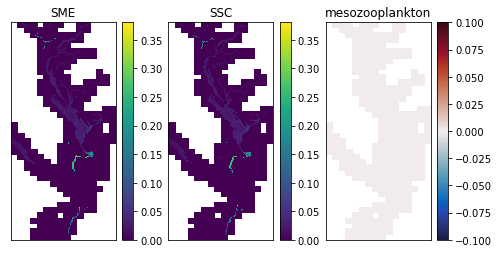

In [6]:
for var in ('nitrate','ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'mesozooplankton'):
    fig,ax=plt.subplots(1,3,figsize=(8,4))
    mesh0=ax[0].pcolormesh(fSME.variables[var][0,30,:,:])
    mesh1=ax[1].pcolormesh(fSSC.variables[var][0,30,:,:])
    icalc=fSME.variables[var][0,30,:,:]-fSSC.variables[var][0,30,:,:]
    a=np.max(np.abs(icalc))/2
    mesh2=ax[2].pcolormesh(icalc,vmin=-a,vmax=a,cmap=cmocean.cm.balance)
    ax[2].set_title(var)
    fig.colorbar(mesh0,ax=ax[0])
    fig.colorbar(mesh1,ax=ax[1])
    fig.colorbar(mesh2,ax=ax[2])
    for axi in (ax[0],ax[1],ax[2]):
        axi.set_xticks([])
        axi.set_yticks([])
    ax[0].set_title('SME')
    ax[1].set_title('SSC')
print('k=30')

In [7]:
# test river forcing- is river Si changing?
fmay=nc.Dataset('/results/SalishSea/hindcast.201812/15may15/SalishSea_1d_20150515_20150515_ptrc_T.nc')

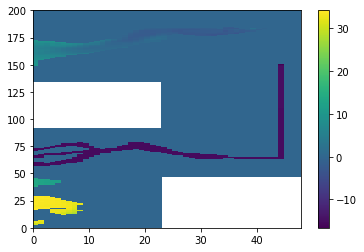

In [8]:
plt.pcolormesh(fSSC.variables['silicon'][0,0,350:550,350:]-fmay.variables['silicon'][0,0,350:550,350:])
plt.colorbar()